In [1]:
import pandas as pd
import gmaps
import os
import requests
import json
import pprint
import numpy as np
import matplotlib.pyplot as plt
from config import g_key

In [2]:
spring = pd.read_csv("combined_spring.csv", low_memory = False)
summer = pd.read_csv("combined_summer.csv", low_memory = False)
spring["Neighborhood"] = ""
summer["Neighborhood"] = ""
spring.head()

,Date/Time,Lat,Lon,Base,Neighborhood
0,4/1/2014 0:11:00,40.769,-73.9549,B02512,
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,


In [3]:
cities_list = []
cities_list = ""

base_url = "https://maps.googleapis.com/maps/api/geocode/json"

for index, row in spring.iterrows():
    
    params = {
              'latlng': f"{row['Lat']},{row['Lon']}",
              'key': g_key,
             }
    
    spring_response = requests.get(base_url, params = params).json()
    results = spring_response['results']
    
    try:
        if (spring_response['results'][0]['address_components'][0]['types'][0] == "neighborhood"):
            spring.loc[index, "Neighborhood"] = spring_response['results'][0]['address_components'][0]['long_name']

        elif (spring_response['results'][0]['address_components'][0]['types'][1] == "neighborhood"):
            spring.loc[index, "Neighborhood"] = spring_response['results'][0]['address_components'][0]['long_name'][1]

        elif (spring_response['results'][0]['address_components'][0]['types'][2] == "neighborhood"):
            spring.loc[index, "Neighborhood"] = spring_response['results'][0]['address_components'][0]['long_name'][2]

        else:
            spring.loc[index, "Neighborhood"] = "NA"
    
    except IndexError:
        print("Location does not have neighborhood.")

Location does not have neighborhood.
Location does not have neighborhood.
Location does not have neighborhood.
Location does not have neighborhood.
Location does not have neighborhood.
Location does not have neighborhood.
Location does not have neighborhood.
Location does not have neighborhood.
Location does not have neighborhood.
Location does not have neighborhood.
Location does not have neighborhood.


KeyboardInterrupt: 

In [113]:
pprint.pprint(spring_response['results'])

[{'address_components': [{'long_name': '28',
                          'short_name': '28',
                          'types': ['street_number']},
                         {'long_name': 'East 63rd Street',
                          'short_name': 'E 63rd St',
                          'types': ['route']},
                         {'long_name': 'Manhattan',
                          'short_name': 'Manhattan',
                          'types': ['political',
                                    'sublocality',
                                    'sublocality_level_1']},
                         {'long_name': 'New York',
                          'short_name': 'New York',
                          'types': ['locality', 'political']},
                         {'long_name': 'New York County',
                          'short_name': 'New York County',
                          'types': ['administrative_area_level_2',
                                    'political']},
                         {'l

In [4]:
spring.head(10)

,Date/Time,Lat,Lon,Base,Neighborhood
0,4/1/2014 0:11:00,40.769,-73.9549,B02512,
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,
5,4/1/2014 0:33:00,40.7383,-74.0403,B02512,
6,4/1/2014 0:39:00,40.7223,-73.9887,B02512,
7,4/1/2014 0:45:00,40.762,-73.979,B02512,
8,4/1/2014 0:55:00,40.7524,-73.996,B02512,
9,4/1/2014 1:01:00,40.7575,-73.9846,B02512,


([<matplotlib.axis.XTick at 0x1cd810a3160>,
 <a list of 2 Text xticklabel objects>)

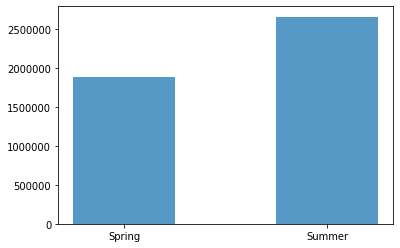

In [5]:
# bar graph of summer and spring uber usage
y_axis = [len(spring), len(summer)]
x_axis = np.arange(len(y_axis))

plt.bar(x_axis, y_axis, alpha = .75, width = .5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Spring", "Summer"])

([<matplotlib.patches.Wedge at 0x1cd8137acc0>,
 [Text(0.8728769176148975, 3.1824653787111523, 'Spring'),
  Text(-0.8993277333001978, -3.2789037235205813, 'Summer')],
 [Text(0.47611468233539855, 1.735890206569719, '41.5%'),
  Text(-0.5025654980206987, -1.8323285513791479, '58.5%')])

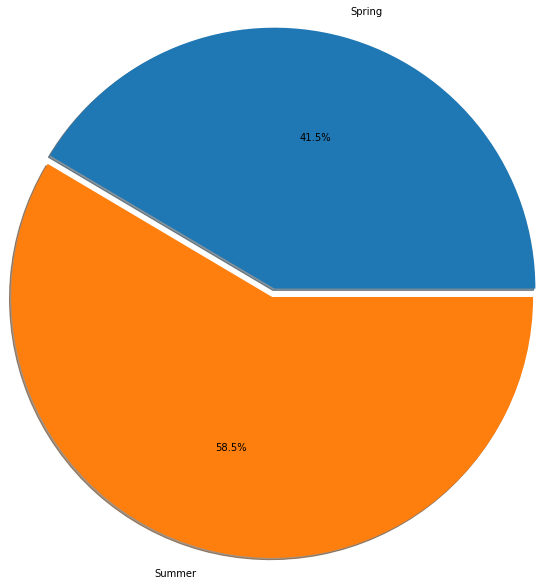

In [9]:
# pie plot of summer and spring uber usage
labels = ["Spring", "Summer"]

data = [len(spring), len(summer)]

explode = [0,.1]

plt.pie(data, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, radius = 3)